### **Import required libraries**

In [ ]:
from sklearn import datasets  
import numpy as np               #for maths
import matplotlib.pyplot as plt  #for plotting

### **Get data**

In [ ]:
iris = datasets.load_iris()      #load the dataset
data = iris.data                 #get features  
target = iris.target             #get labels

shape = data.shape               #shape of data

#convert into numpy array
data = np.array(data).reshape(shape[0],shape[1])
target = np.array(target).reshape(shape[0],1)

#print shape
print("Data Shape   = {}".format(data.shape))
print("Target Shape = {}".format(target.shape))
print('Classes : {}'.format(np.unique(target)))
print('Sample data : {} , Target = {}'.format(data[70],target[70]))

### **Define Parameters and Hyperparameters**

### Input Units = 2

###Hidden Units = 4

###Output Units = 1





In [ ]:

#num of target labels
num_classes = len(np.unique(target))

#define layer_neurons
input_units  = 2   #neurons in input layer
hidden_units = 4   #neurons in hidden layer
output_units = 1   #neurons in output layer

#define hyper-parameters
learning_rate = 0.03

#regularization parameter
beta = 0.00001


#num of iterations
iters = 4001

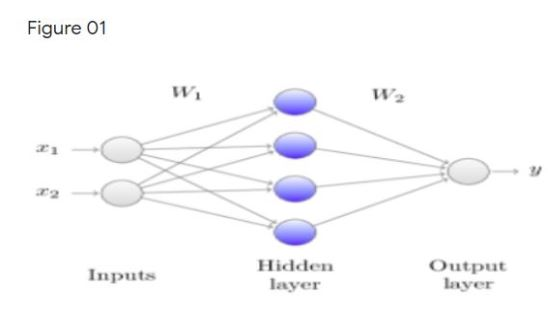## **Dimesions of Parameters**

Shape of layer1_weights (W1) = (2,4)

Shape of layer1_biasess (B1) = (4,1)

Shape of layer2_weights (W2) = (4,1)

Shape of layer2_biasess (B1) = (1,1)


In [ ]:
def initialize_parameters():
    #initial values should have zero mean and 0.1 standard deviation
    mean = 0        #mean of parameters 
    std = 0.03      #standard deviation
    
    layer1_weights = np.random.normal(mean,std,(input_units,hidden_units))          
    layer1_biases = np.ones((hidden_units,1))                                       
    layer2_weights = np.random.normal(mean,std,(hidden_units,output_units))
    layer2_biases = np.ones((output_units,1))
    
    parameters = dict()
    parameters['layer1_weights'] = layer1_weights
    parameters['layer1_biases'] = layer1_biases
    parameters['layer2_weights'] = layer2_weights
    parameters['layer2_biases'] = layer2_biases
    
    return parameters

## **Activation Function**

In [ ]:
def sigmoid(X):
    return 1/(1+np.exp((-1)*X))
def RELU(X):
    return X * (X > 0)

## **Forward Propagation**

In [ ]:
#forward propagation
def forward_propagation(train_dataset,parameters):
    cache = dict()            #to store the intermediate values for backward propagation
    m = len(train_dataset)    #number of training examples
    
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer1_biases = parameters['layer1_biases']
    layer2_weights = parameters['layer2_weights']
    layer2_biases = parameters['layer2_biases']
    
    #forward prop
    logits = np.matmul(train_dataset,layer1_weights) + layer1_biases.T
    activation1 = np.array(RELU(logits)).reshape(m,hidden_units)    ###### USED Relu on input layers

    activation2 = np.array(np.matmul(activation1,layer2_weights) + layer2_biases.T).reshape(m,output_units)
    output = np.array(sigmoid(activation2)).reshape(m,num_classes) ##### Used sigmoid on input layers
    
    #fill in the cache
    cache['output'] = output
    cache['activation1'] = activation1
    
    return cache,output


## **Back Propagation**

In [ ]:
def backward_propagation(train_dataset,train_labels,parameters,cache):
    derivatives = dict()         #to store the derivatives
    
    #get stuff from cache
    output = cache['output']
    activation1 = cache['activation1']
    
    #get parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #calculate errors
    error_output = output - train_labels
    error_activation1 = np.matmul(error_output,layer2_weights.T)
    error_activation1 = np.multiply(error_activation1,activation1)
    error_activation1 = np.multiply(error_activation1,1-activation1)
    
    
    #calculate partial derivatives
    partial_derivatives2 = np.matmul(activation1.T,error_output)/len(train_dataset)
    partial_derivatives1 = np.matmul(train_dataset.T,error_activation1)/len(train_dataset)
    
    #store the derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    
    return derivatives


/content
